In [ ]:
######################################################################################################################
#                                                                                                                    #
#    Assignment Description:                                                                                         #
#    Learn, reproduce, annotate and extend an existing example of neural network machine learning—                   #
#    Select an example from the Examples folder in the Keras repository.                                             #
#    Read through it and try to make sense of what it is doing. Then                                                 #
#    Build a Jupyter notebook around the example code and get it to reproduce the original example.                  #
#    Learn what it's doing and try to explain it. Write headings and text to break                                   #
#    it into pieces to explain what it's doing. Show output and images/plots to help teach the reader.               #
#    Explain terms and give good descriptions. Assume you're writing for other students in the class (which you are).#
#    Now play around with it.                                                                                        #
#    Make new sections below the main example and try out new models, more layers, different activation functions,   #
#    different optimizers, different ...                                                                             #
#    Try to explain what you're seeing. Why did it get better, or worse? Show something interesting.                 #
#                                                                                                                    #
######################################################################################################################

In [ ]:
######################################################################################################################
# Author of Assignment: Jonathan Elliott                                                                            #
# Due Date: 03/17/2017                                                                                              #
# Class: Intelligent Systems - CS 431                                                                               #
# Name of project: LSTM benchmarks                                                                                  #
# Long Short Term Memory networks                                                                                   #
#                                                                                                                   #
# They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people          #
# in following work.                                                                                                #
#      1 They work tremendously well on a large variety of problems, and are now widely used.                       #
#      2 LSTMs are explicitly designed to avoid the long-term dependency problem.                                   #
#      3 Remembering information for long periods of time is practically their default behavior,                    #
#        not something they struggle to learn!                                                                      #
#      4 All recurrent neural networks have the form of a chain of repeating modules of neural network.             #
#                                                                                                                   # 
# In this example our methods are evaluated using the bench-                                                        #
# mark data sets Reuters Newswire Topics Classification, IMDB                                                       #
# database for binary sentiment classification, MNIST database                                                      #
# of handwritten digits and CIFAR-10 data set for image classification                                              #
#                                                                                                                   #
# Using Eigenvalue Decay in Keras, the Sequential model, and the python file "imdb.py" for reference                #
#                                                                                                                   #
#  implementation=0 preprocesses input to the LSTM which typically results in                                       #
# faster computations at the expense of increased peak memory usage as the                                          #
# preprocessed input must be kept in memory.                                                                        #
#                                                                                                                   #
# implementation=1 does away with the preprocessing, meaning that it might take                                     #
# a little longer, but should require less peak memory.                                                             #
#                                                                                                                   #
# implementation=2 concatenates the input, output and forget gate's weights                                         #
# into one, large matrix, resulting in faster computation time as the GPU can                                       #
# utilize more cores, at the expense of reduced regularization because the same                                     #
# dropout is shared across the gates.                                                                               #
#                                                                                                                   #
#                                                                                                                   #
#####################################################################################################################

Loading data...
Testing mode: implementation=0
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 128s - loss: 0.6273 - acc: 0.6469 - val_loss: 0.5857 - val_acc: 0.6938


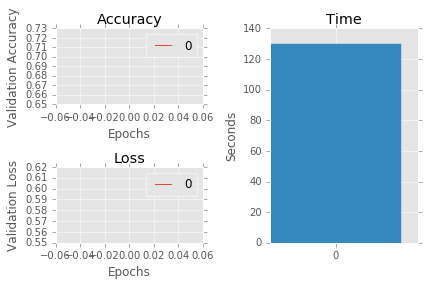

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout
from keras.datasets import imdb

class lab4:
    max_features = 200
    max_length = 80
    embedding_dim = 25
    batch_size = 12
    epochs = 10
    modes = [0, 1, 2]
    print('Loading data...')
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
    X_train = sequence.pad_sequences(X_train, max_length)
    X_test = sequence.pad_sequences(X_test, max_length)
    results = []
    
    for mode in modes:
        print('Testing mode: implementation={}'.format(mode))

        model = Sequential()
        model.add(Embedding(max_features, embedding_dim,input_length=max_length))
        model.add(Dropout(0.2))
        model.add(LSTM(embedding_dim, dropout=0.2, recurrent_dropout=0.2, implementation=mode))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

        start_time = time.time()
        history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(X_test, y_test))
        average_time_per_epoch = (time.time() - start_time) / epochs

        results.append((history, average_time_per_epoch))
        plt.style.use('ggplot')
        
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax1.set_title('Accuracy')
    ax1.set_ylabel('Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    ax2.set_title('Loss')
    ax2.set_ylabel('Validation Loss')
    ax2.set_xlabel('Epochs')
    ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    ax3.set_title('Time')
    ax3.set_ylabel('Seconds')
    for mode, result in zip(modes, results):
        ax1.plot(result[0].epoch, result[0].history['val_acc'], label=mode)
        ax2.plot(result[0].epoch, result[0].history['val_loss'], label=mode)
    ax1.legend()
    ax2.legend()
    ax3.bar(np.arange(len(results)), [x[1] for x in results], tick_label=modes, align='center')
    plt.tight_layout()
    plt.show()